# Plotting turnstile data

In [281]:
from Utils import ReadTurnstilesDataBase
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime

In [128]:
turnstile_df = ReadTurnstilesDataBase.readTurnstileData()
turnstile_df.fecha_instalacion = pd.to_datetime(turnstile_df.fecha_instalacion)
turnstile_df['day'] = turnstile_df['fecha_instalacion'].apply(lambda x: "%d" % (x.day))
turnstile_df['month'] = turnstile_df['fecha_instalacion'].apply(lambda x: "%d" % (x.month))
turnstile_df['year'] = turnstile_df['fecha_instalacion'].apply(lambda x: "%d" % (x.year))
turnstile_df['month_year'] = turnstile_df['fecha_instalacion'].apply(lambda x: "%d/%d" % (x.month, x.year))

* Grouping by year

In [216]:
counts_by_year = turnstile_df.groupby(['year']).size().to_frame()
counts_by_year['year'] = counts_by_year.index
N=1
ind = np.arange(N)
width = 1
counts_by_year.columns = ['counts', 'year']

In [179]:
start_count = int(counts_by_year.counts[0])
second_year_count = int(counts_by_year.counts[1])
third_year_count = int(counts_by_year.counts[2])
fourth_year_count = int(counts_by_year.counts[3])
print(start_count)
print(second_year_count)
print(third_year_count)
print(fourth_year_count)

1296
10
186
703


* Plotting

In [223]:
colors = [(3, 169, 244),(0, 150, 136),(76, 175, 80),(205, 220, 57)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

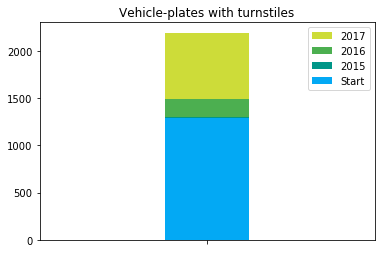

In [230]:
fig, ax = plt.subplots()
p1 = ax.bar(ind, start_count, width = width, color = colors[0])
p2 = ax.bar(ind, second_year_count, bottom = start_count, width = width, color = colors[1])
p3 = ax.bar(ind, third_year_count, bottom = start_count+second_year_count, width = width, color = colors[2])
p4 = ax.bar(ind, fourth_year_count, bottom = start_count+second_year_count+third_year_count, width = width, color = colors[3])
plt.xticks(ind, (' '))
#plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Start', '2015', '2016', '2017'))
ax.set_xlim(-2, 2)
ax.set_title('Vehicle-plates with turnstiles')
plt.legend((p4[0],p3[0],p2[0],p1[0]), ('2017','2016','2015','Start'))
plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/vehicle-plates-with-turnstiles.pdf')

* Grouping by month-year

In [272]:
counts_by_month_year = turnstile_df.groupby(['month_year']).size().to_frame()
counts_by_month_year['month_year'] = counts_by_month_year.index
counts_by_month_year['month_year'] =  pd.to_datetime(counts_by_month_year.month_year)
counts_by_month_year.columns = ['counts', 'month_year']
counts_by_month_year = counts_by_month_year.sort_values(by=['month_year'], ascending=[True])
counts_by_month_year['Cumulative'] = counts_by_month_year['counts'].cumsum()
counts_by_month_year.loc['1/1900',('month_year')] = pd.to_datetime('2015-11-01')

In [273]:
counts_by_month_year

,counts,month_year,Cumulative
month_year,,,
1/1900,1296,2015-11-01,1296
12/2015,10,2015-12-01,1306
4/2016,18,2016-04-01,1324
5/2016,32,2016-05-01,1356
7/2016,36,2016-07-01,1392
8/2016,33,2016-08-01,1425
9/2016,4,2016-09-01,1429
10/2016,31,2016-10-01,1460
11/2016,5,2016-11-01,1465


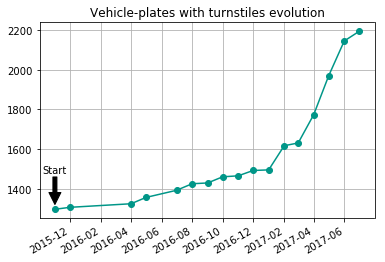

In [321]:
fig, ax_1 = plt.subplots()
ax_1.plot(counts_by_month_year.month_year,counts_by_month_year.Cumulative, 'o-', color=colors[1])
ax_1.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate()
ax_1.grid(True)
ax_1.set_title('Vehicle-plates with turnstiles evolution')
ax_1.annotate('Start', xy=(pd.to_datetime('2015-11-01'), 1320), xytext=(pd.to_datetime('2015-11-01'), 1520),
            arrowprops=dict(facecolor='black', shrink=0.001),horizontalalignment='center', verticalalignment='top')